# Import data dan membuat data frame

In [1]:
#Import dataset dari sklearn
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

dataset = load_diabetes()
dataset
#df = pd.DataFrame(data=np.c_[dataset['data'],dataset['target']],columns=dataset['feature_names']+['target'])
#df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

# Deskripsi Data

In [2]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Informasi yang di dapat dari uraian di atas adalah dataset yang dimuat hanya memiliki 442 baris dan 10 fitur. Serta diketahui bahwa data dari fitur tersebut merupakan hasil penskalaan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


# Apakah terdapat data yang hilang ?

In [4]:
np.sum(df.isnull())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Dataset yang digunakan merupakan data yang lengkap

# Bagaimana statistik dari masing-masing variabel ?

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


# Bagaimana distribusi dari masing-masing variabel ? apakah terdapat outlier ?
## Analisis Age

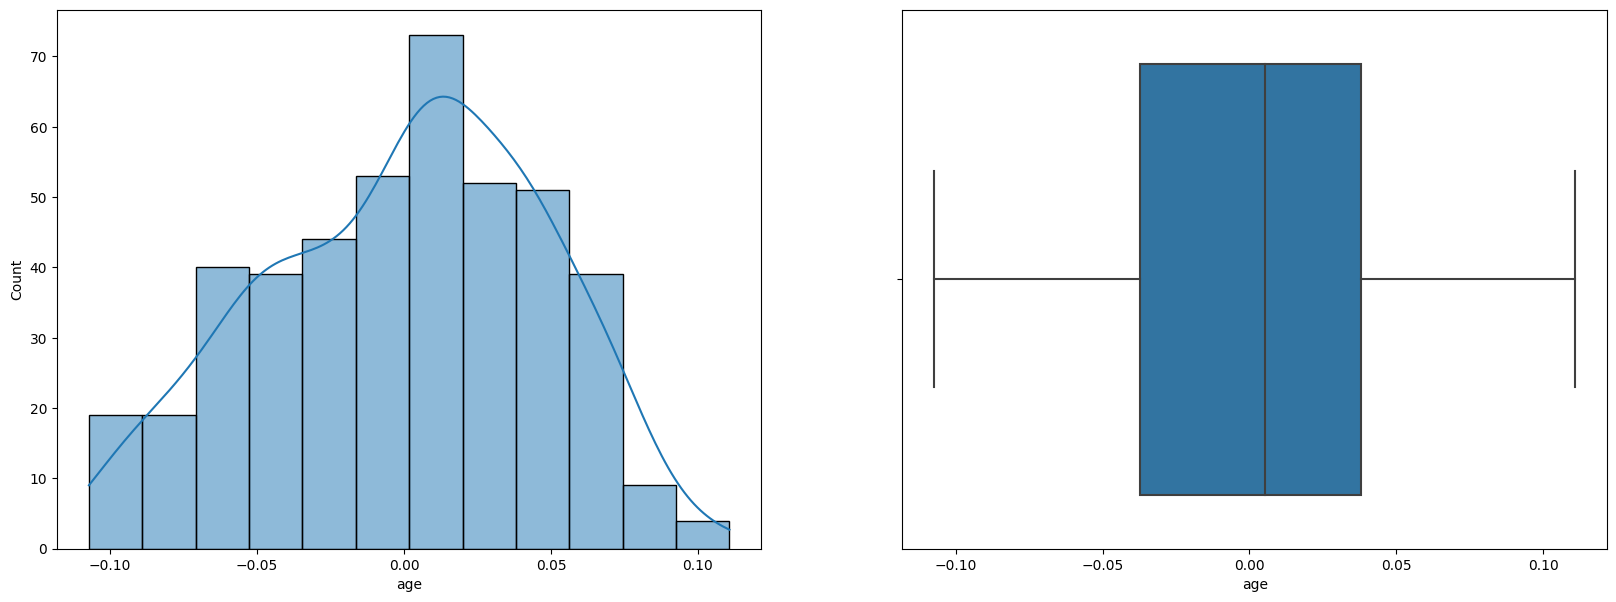

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='age',kde=True,ax=ax[0])
sns.boxplot(data=df,x='age',ax=ax[1])
plt.show()

In [7]:
print(f"Mean Age : {df['age'].mean():.5f}")
print(f"Median Age : {df['age'].median():.5f}")
print(f"Maximum Age :{df['age'].max():.5f}")
print(f"Minimum Age :{df['age'].min():.5f}")

Mean Age : -0.00000
Median Age : 0.00538
Maximum Age :0.11073
Minimum Age :-0.10723


Berdasarkan analisa BMI diperoleh informasi:
* Mean dan median dari BMI hampir mendekati sama akibatnya distribusi akan terlihat hampir simetri
* Karena Median > Mean, maka distribusi dari BMI akan sedikit miring ke kiri
* Tidak terdapat outlier

# Analisis Sex

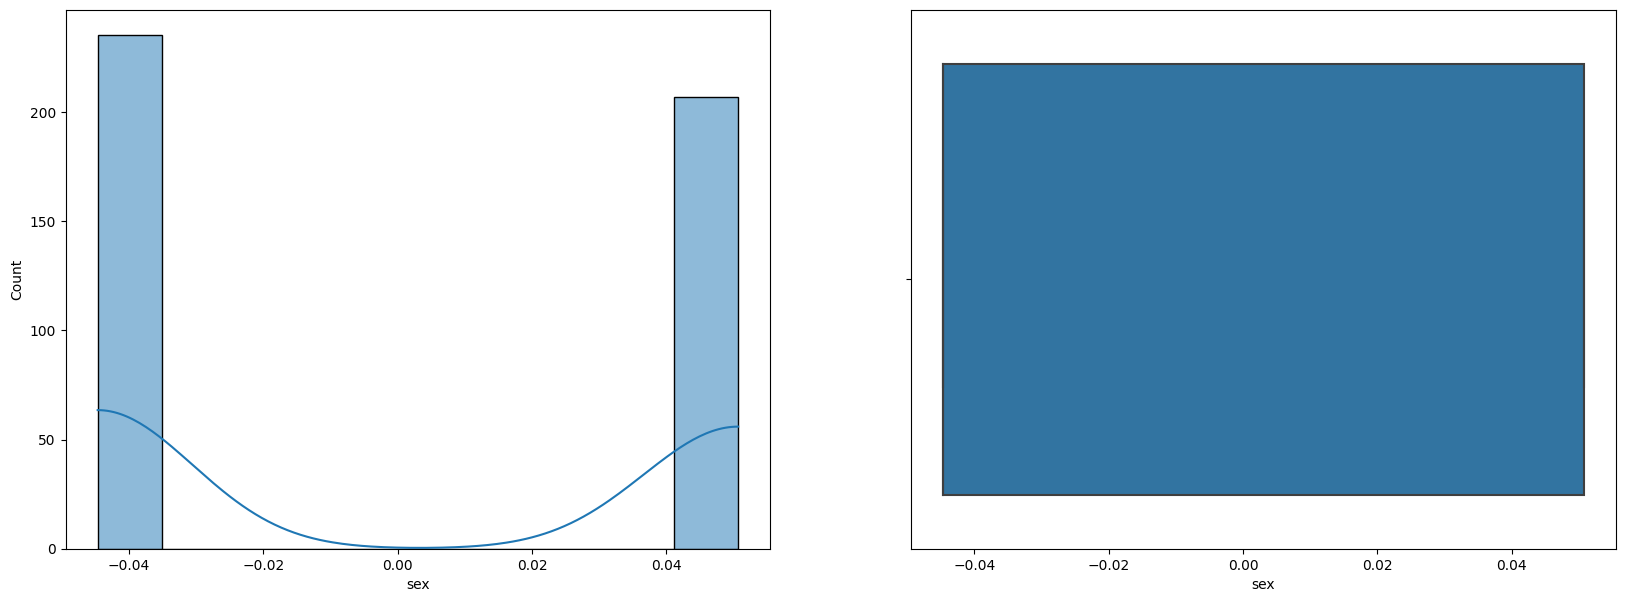

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='sex',kde=True,ax=ax[0])
sns.boxplot(data=df,x='sex',ax=ax[1])
plt.show()

# Analisis BMI

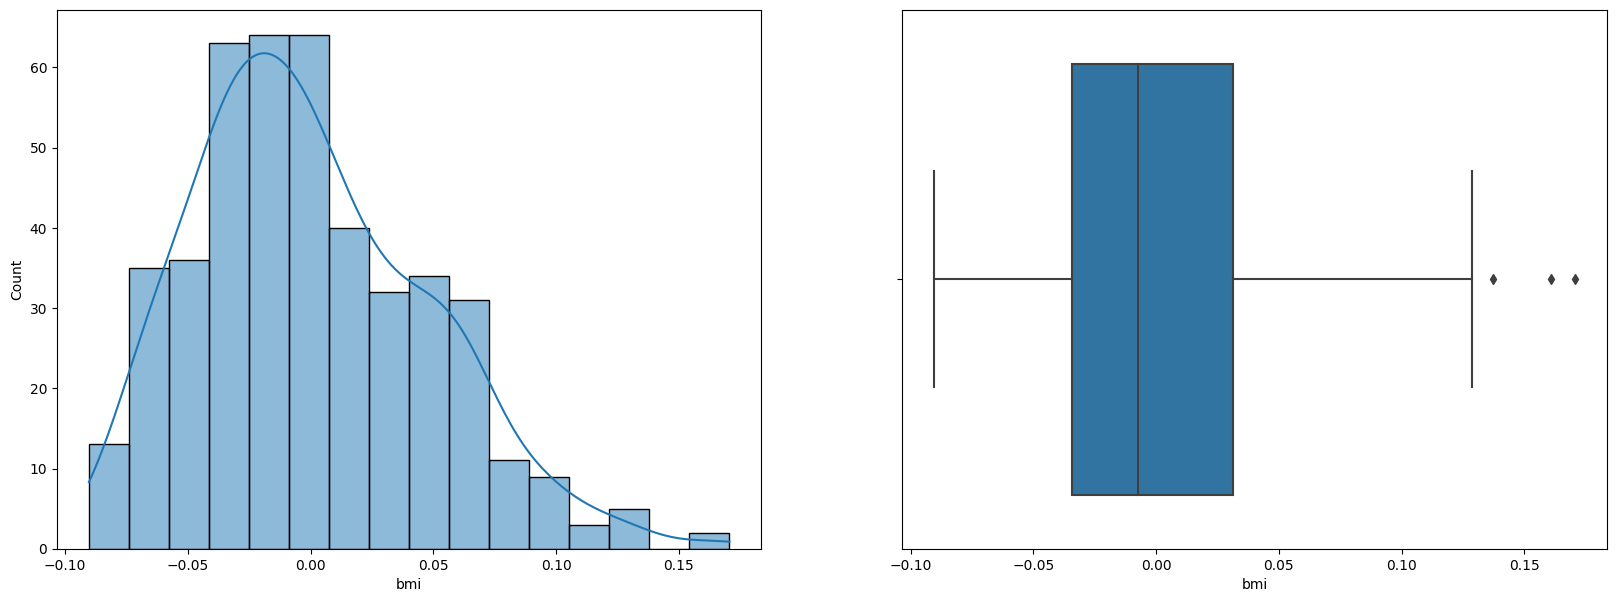

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='bmi',kde=True,ax=ax[0])
sns.boxplot(data=df,x='bmi',ax=ax[1])
plt.show()

In [10]:
print(f"Mean BMI : {df['bmi'].mean():.5f}")
print(f"Median BMI : {df['bmi'].median():.5f}")
print(f"Maximum BMI :{df['bmi'].max():.5f}")
print(f"Minimum BMI :{df['bmi'].min():.5f}")

Mean BMI : -0.00000
Median BMI : -0.00728
Maximum BMI :0.17056
Minimum BMI :-0.09028


Berdasarkan analisa BMI diperoleh informasi:
* Mean dan median dari BMI hampir mendekati sama akibatnya distribusi akan terlihat hampir simetri
* Karena Median < Mean, maka distribusi dari BMI akan sedikit miring ke kanan
* Nampak bahwa terdapat beberapa outlier

## Analisis Tekanan Darah

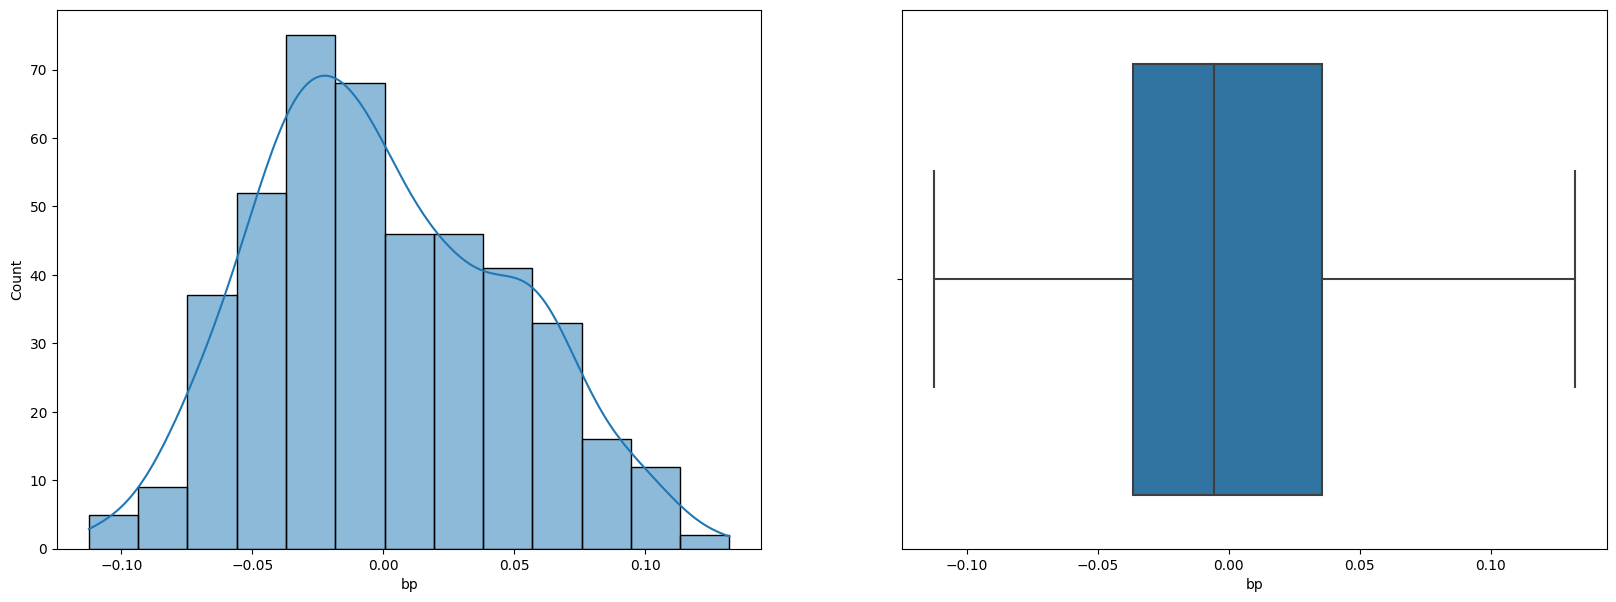

In [11]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='bp',kde=True,ax=ax[0])
sns.boxplot(data=df,x='bp',ax=ax[1])
plt.show()

In [12]:
print(f"Mean BP : {df['bp'].mean():.5f}")
print(f"Median BP : {df['bp'].median():.5f}")
print(f"Max BP : {df['bp'].max():.5f}")

Mean BP : -0.00000
Median BP : -0.00567
Max BP : 0.13204


Berdasarkan analisa Tekanan Darah diperoleh informasi:
* Mean dan median dari BP hampir mendekati sama akibatnya distribusi akan terlihat hampir simetri
* Karena Median < Mean, maka distribusi dari BP akan sedikit miring ke kanan
* Terlihat bahwa tidak memiliki outlier

## Analisis Total Serum Cholesterol

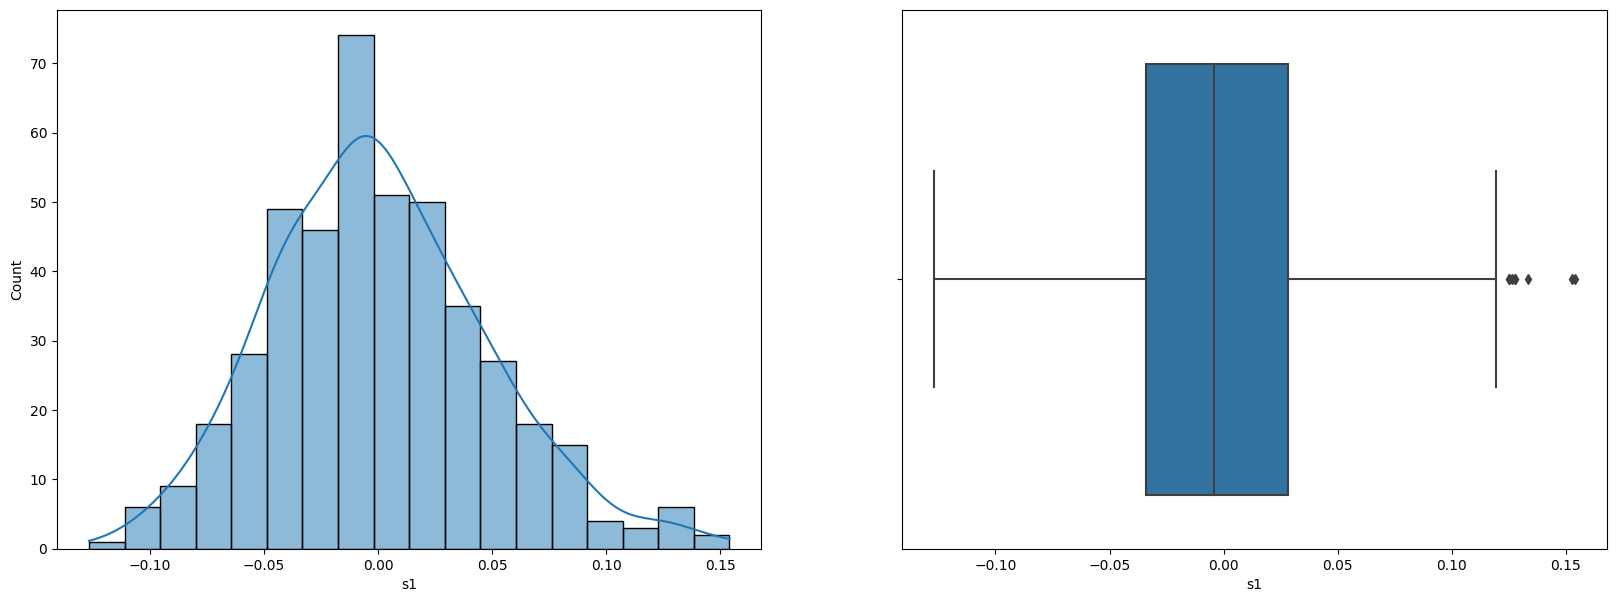

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='s1',kde=True,ax=ax[0])
sns.boxplot(data=df,x='s1',ax=ax[1])
plt.show()

In [14]:
print(f"Mean TC : {df['s1'].mean():.5f}")
print(f"Median TC : {df['s1'].median():.5f}")
print(f"Max TC : {df['s1'].max():.5f}")

Mean TC : -0.00000
Median TC : -0.00432
Max TC : 0.15391


Berdasarkan analisa Total Serum Cholesterol diperoleh informasi:
* Mean dan median dari TC hampir mendekati sama akibatnya distribusi akan terlihat hampir simetri
* Karena Median < Mean, maka distribusi dari TC akan sedikit miring ke kanan
* Memiliki beberapa outlier

## Analisis low-density lipoproteins

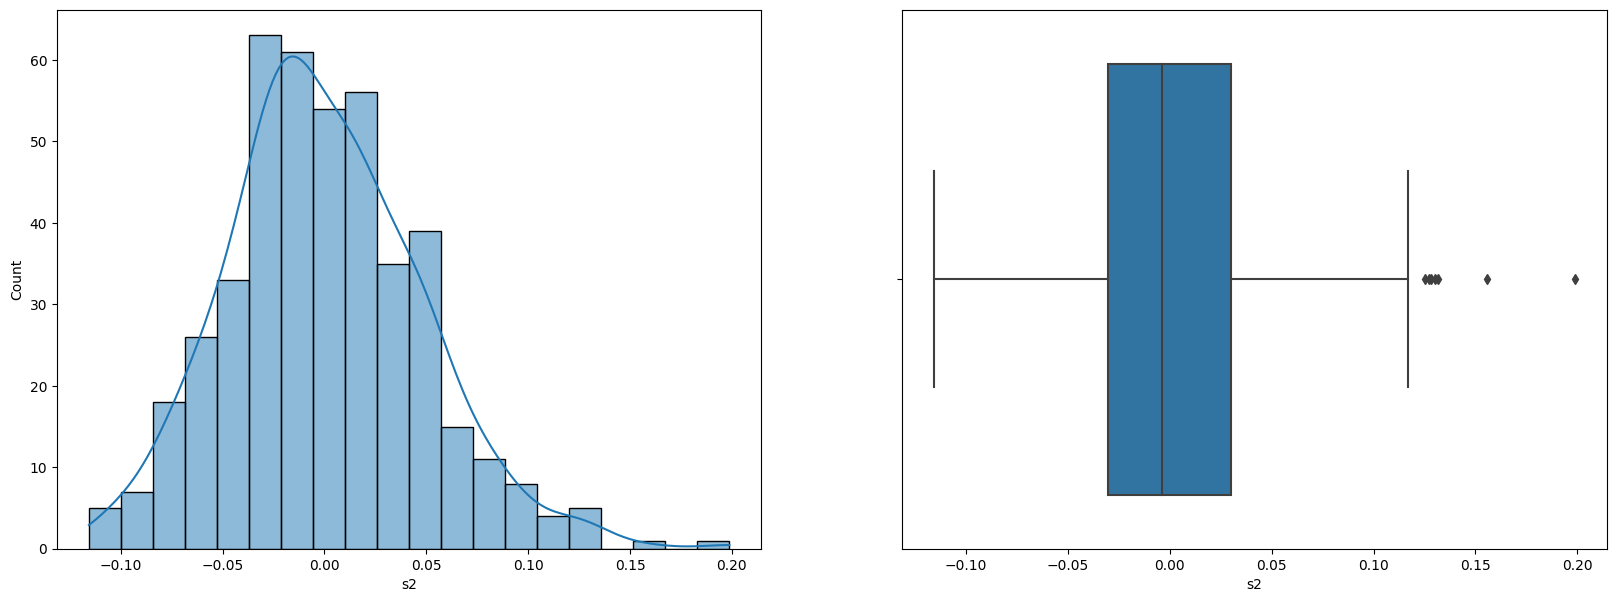

In [15]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='s2',kde=True,ax=ax[0])
sns.boxplot(data=df,x='s2',ax=ax[1])
plt.show()

In [16]:
print(f"Mean LDL : {df['s2'].mean():.5f}")
print(f"Median LDL : {df['s2'].median():.5f}")
print(f"Max LDL : {df['s2'].max():.5f}")

Mean LDL : 0.00000
Median LDL : -0.00382
Max LDL : 0.19879


Berdasarkan analisa low-density lipoproteins diperoleh informasi:
* Mean dan median dari ldl hampir mendekati sama akibatnya distribusi akan terlihat hampir simetri
* Karena Median < Mean, maka distribusi dari ldl akan sedikit miring ke kanan
* Memiliki Beberapa outlier

## Analisis high-density lipoproteins

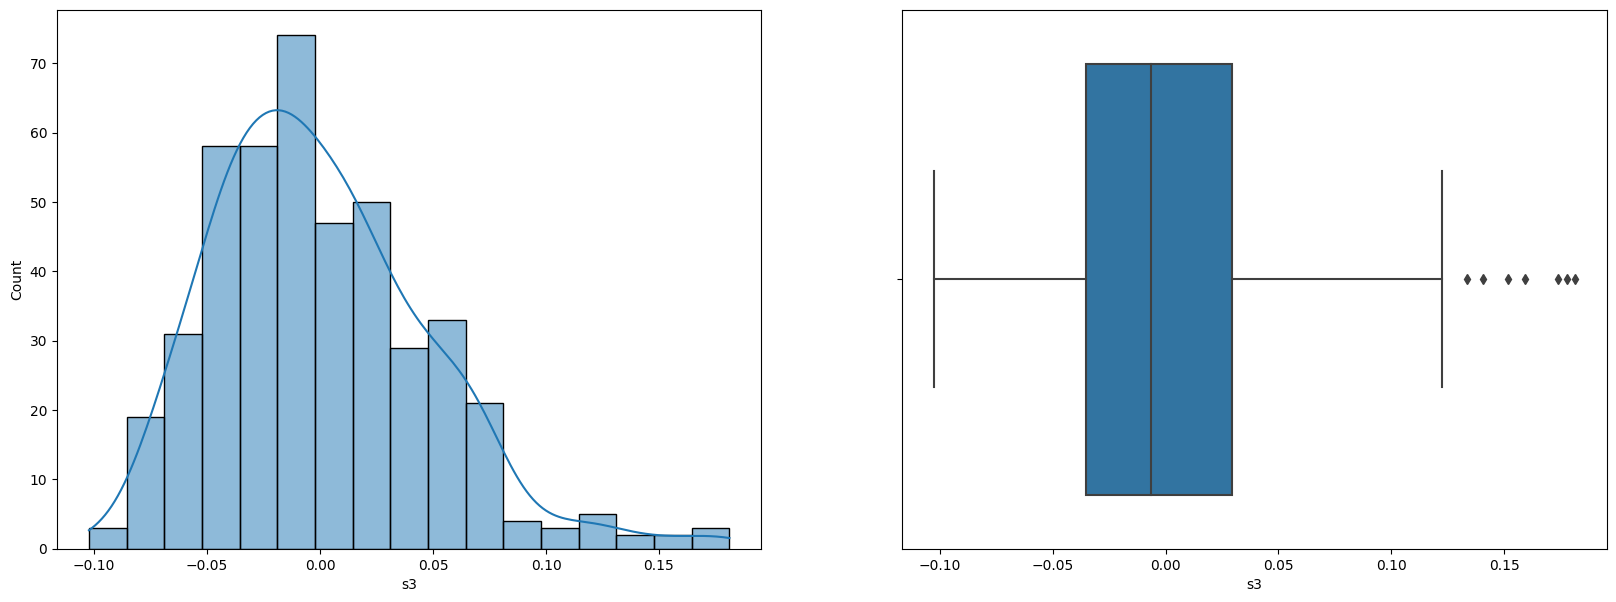

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='s3',kde=True,ax=ax[0])
sns.boxplot(data=df,x='s3',ax=ax[1])
plt.show()

In [18]:
print(f"Mean HDL : {df['s3'].mean():.5f}")
print(f"Median HDL : {df['s3'].median():.5f}")
print(f"Max HDL : {df['s3'].max():.5f}")

Mean HDL : -0.00000
Median HDL : -0.00658
Max HDL : 0.18118


Berdasarkan analisa high-density lipoproteins diperoleh informasi:
* Mean dan median dari hdl hampir mendekati sama akibatnya distribusi akan terlihat hampir simetri
* Karena Median < Mean, maka distribusi dari hdl akan sedikit miring ke kanan
* Memiliki beberapa outlier

## Analisis total cholesterol / HDL

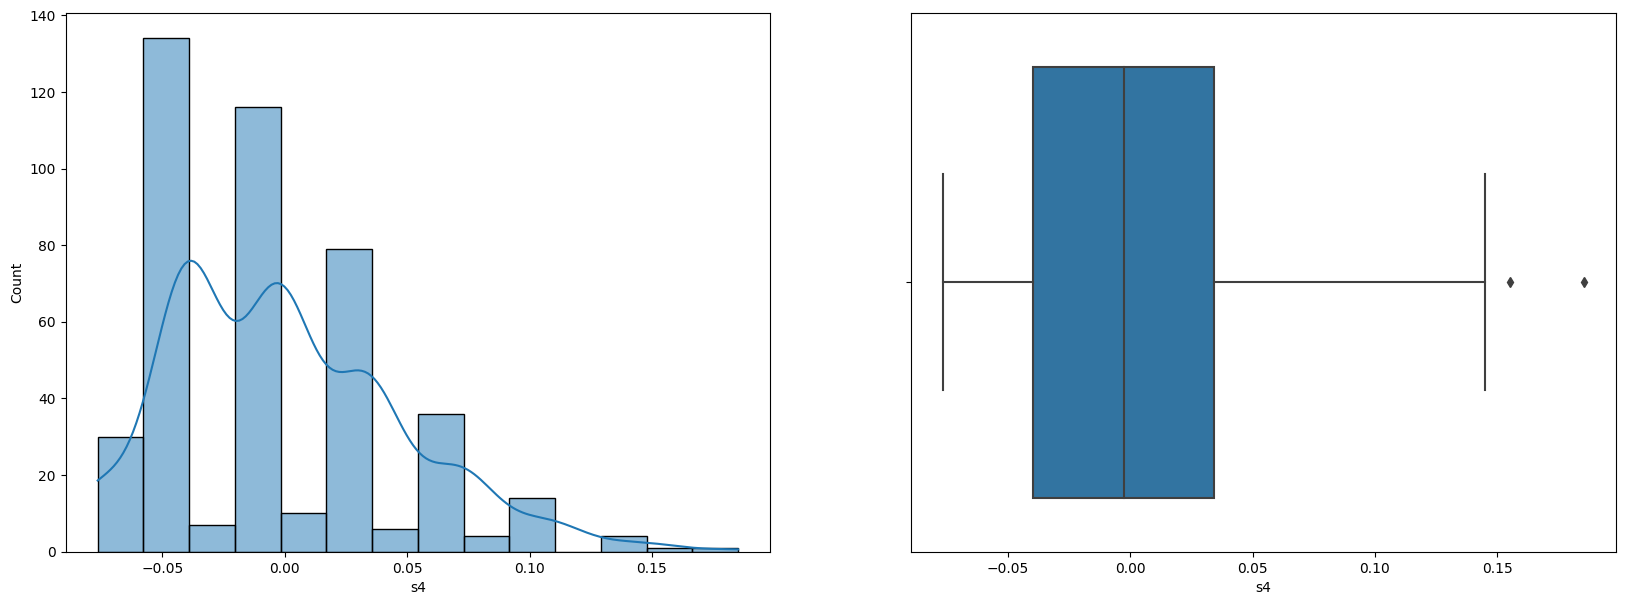

In [19]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='s4',kde=True,ax=ax[0])
sns.boxplot(data=df,x='s4',ax=ax[1])
plt.show()

In [20]:
print(f"Mean TCH : {df['s4'].mean():.5f}")
print(f"Median TCH : {df['s4'].median():.5f}")
print(f"Max TCH : {df['s4'].max():.5f}")

Mean TCH : -0.00000
Median TCH : -0.00259
Max TCH : 0.18523


Berdasarkan analisa total cholesterol/HDL diperoleh informasi:
* Mean dan median dari tch hampir mendekati sama akan tetapi distribusinya tidak simetri sama sekali
* Karena Median < Mean, maka distribusi dari tch akan sedikit miring ke kanan
* Memiliki beberapa outlier

## Analisis possibly log of serum triglycerides level

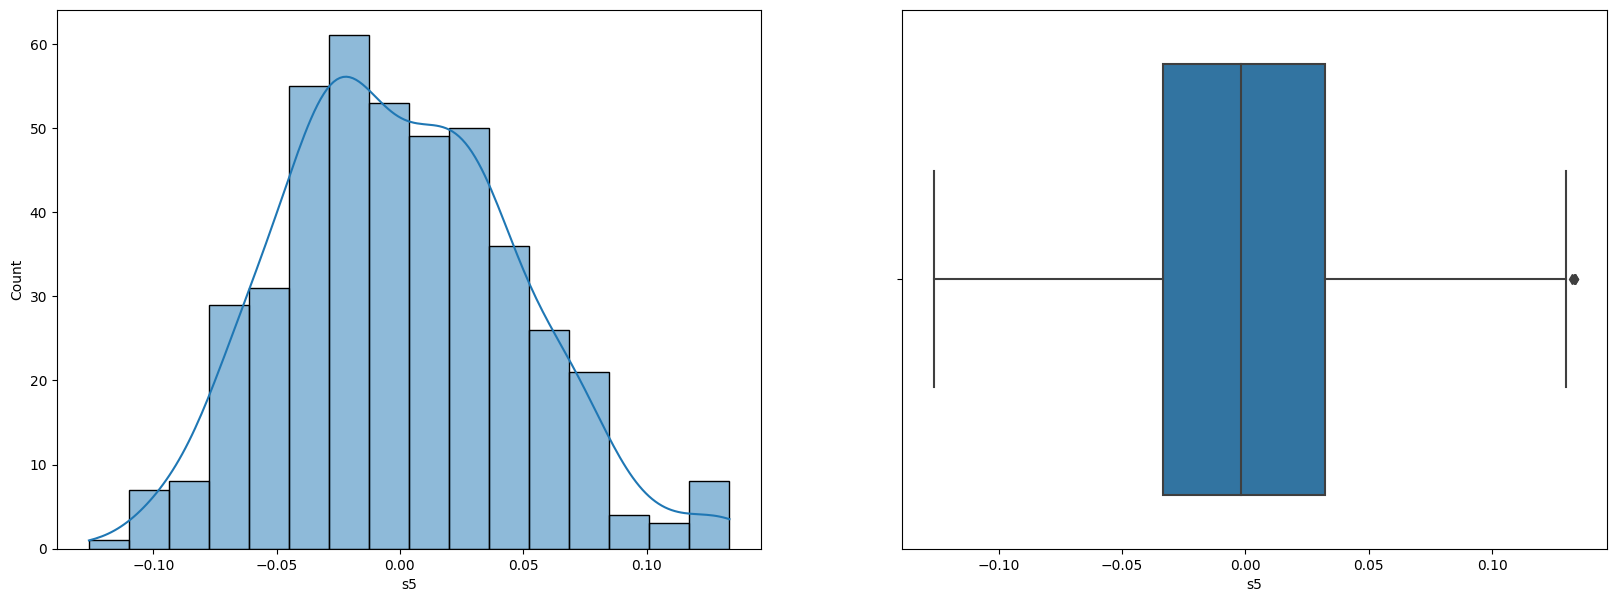

In [21]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='s5',kde=True,ax=ax[0])
sns.boxplot(data=df,x='s5',ax=ax[1])
plt.show()

In [22]:
print(f"Mean LTG : {df['s5'].mean():.5f}")
print(f"Median LTG : {df['s5'].median():.5f}")
print(f"Max LTG : {df['s5'].max():.5f}")

Mean LTG : 0.00000
Median LTG : -0.00195
Max LTG : 0.13360


Berdasarkan analisa possibly log of serum triglycerides level diperoleh informasi:
* Mean dan median dari ltg hampir mendekati sama akibatnya distribusi akan terlihat hampir simetri
* Karena Median < Mean, maka distribusi dari ltg akan sedikit miring ke kanan
* Memiliki beberapa outlier

## Analisis blood sugar level

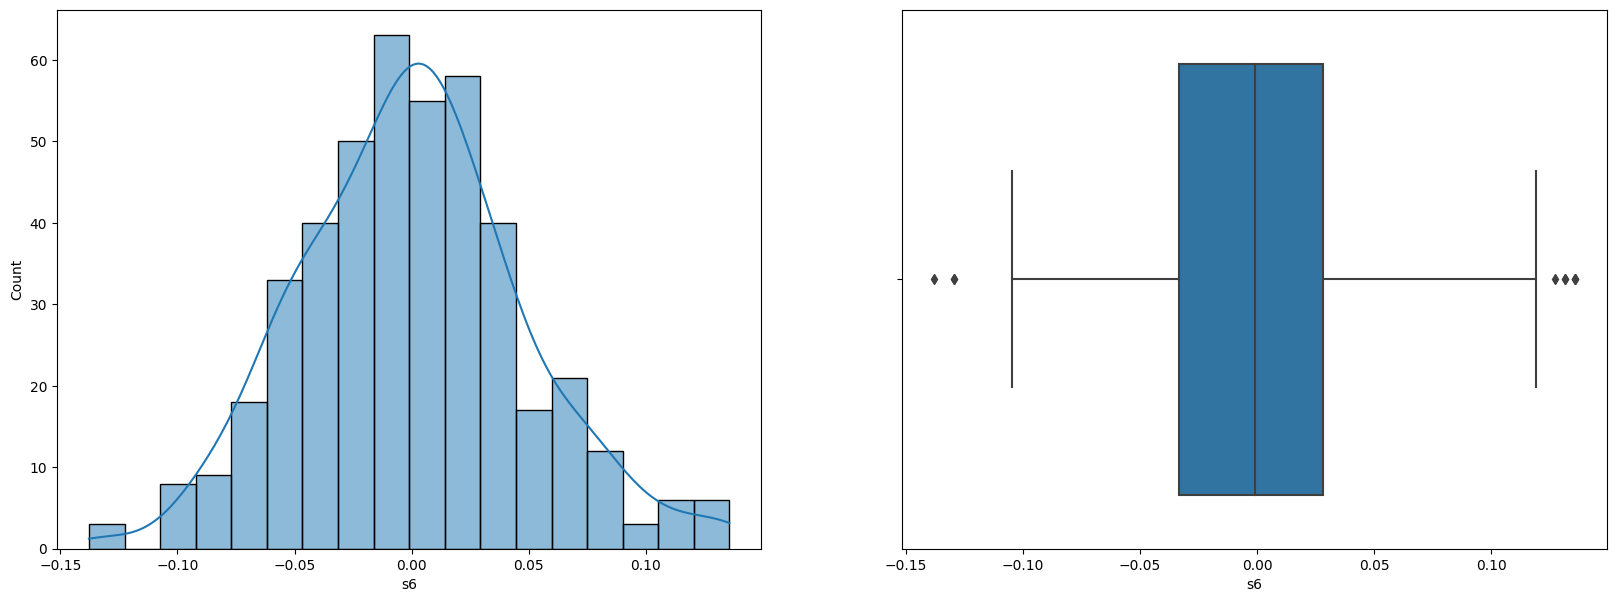

In [23]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='s6',kde=True,ax=ax[0])
sns.boxplot(data=df,x='s6',ax=ax[1])
plt.show()

In [24]:
print(f"Mean GLU : {df['s6'].mean():.5f}")
print(f"Median Glu : {df['s6'].median():.5f}")
print(f"Max Glu : {df['s6'].max():.5f}")

Mean GLU : 0.00000
Median Glu : -0.00108
Max Glu : 0.13561


Berdasarkan analisa blood sugar level diperoleh informasi:

* Mean dan median dari glu hampir mendekati sama akibatnya distribusi akan terlihat hampir simetri
* Karena Median < Mean, maka distribusi dari glu akan sedikit miring ke kanan
* Memiliki beberapa outlier

# Analisis Target

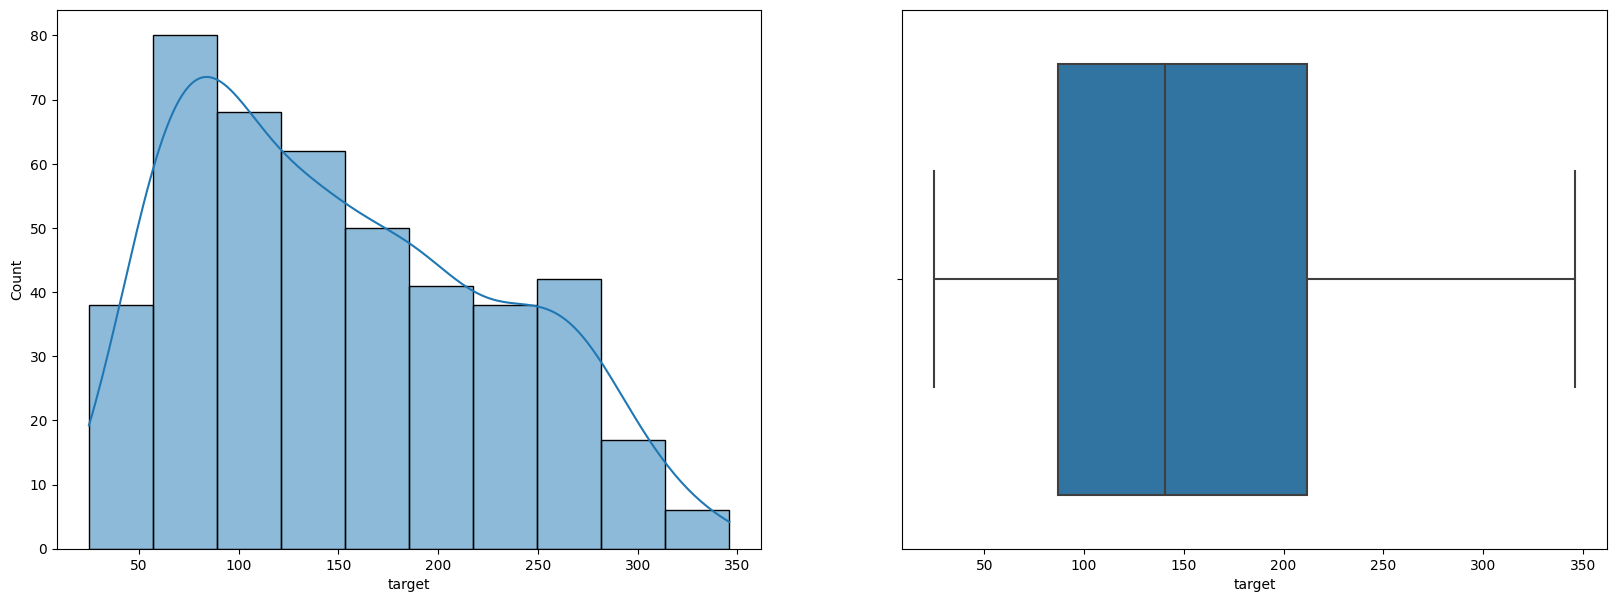

In [25]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='target',kde=True,ax=ax[0])
sns.boxplot(data=df,x='target',ax=ax[1])
plt.show()

In [26]:
print(f"Mean target : {df['target'].mean():.5f}")
print(f"Median target : {df['target'].median():.5f}")
print(f"Max target : {df['target'].max():.5f}")

Mean target : 152.13348
Median target : 140.50000
Max target : 346.00000


Berdasarkan analisa Target diperoleh informasi:

* Mean dan median dari target memiliki perbedaan yang lumayan jauh sehingga distribusinya tidaklah simetris
* Karena Median < Mean, maka distribusi dari glu akan sedikit miring ke kanan
* Tidak memiliki beberapa outlier

# Analisis Korelasi Antar Variabel
## Bagaimana korelasi antar variabelnya ?

<Axes: >

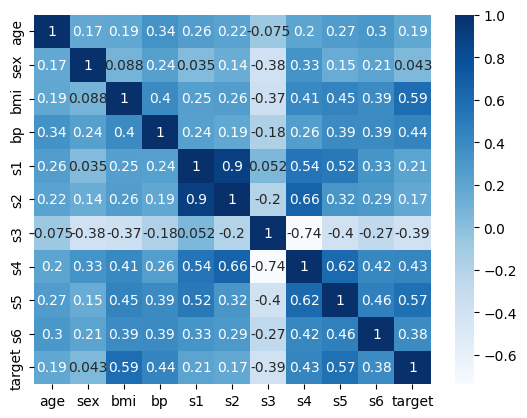

In [27]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="Blues")

# Kesimpulan
Usia dan jenis kelamin dapat dikatakan tidak memiliki pengaruh yang kuat dalam peningkatan perkembangan penyakit diabetes, namun demikian hal ini dapat diperkuat apabila BMI yang dimiliki oleh penderita besar dimana cenderung menuju ke obesitas. Selain itu, terlihat bahwa terdapat hubungan antara penimbunan kadar lemak, kolesterol, dan tekanan darah terhadap perkembangan penyakit diabetes yang masing-masing direpresentasikan oleh variabel s5,s4,dan bp. Jadi, dapat disimpulkan bahwa penderita yang memiliki BMI yang besar bahkan cenderung menuju ke obesitas dan terdapat penimbunan lemak di dalam tubuhnya serta kolesterol akan meningkatkan perkembangan penyakit diabetes.

# Rekomendasi
Disarankan penderita untuk tidak mengonsumsi baik makanan yang mengandung HDL maupun LDL karena akan meningkatkan kadar kolesterol dalam tubuh. Untuk penderita yang memiliki kadar lemak yang berlebih disarankan untuk melakukan aktivitas olahraga yang cukup agar menghindari terjadinya penimbunan lemak dalam tubuh.